<a id="2"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing libraries</p>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
from   plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("Egypt_Houses_Price.csv")

In [3]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cleaning Data</p>

In [5]:
df.replace("Unknown", np.nan , inplace =True)
df.replace("Unknown ", np.nan , inplace =True)

In [6]:
df.dropna(inplace = True)

In [7]:
df = df.convert_dtypes()

In [8]:
df["Price"] = df.Price.astype("int32")
df["Bedrooms"] = df.Bedrooms.astype("float32")
df["Bathrooms"] = df.Bathrooms.astype("float32")
df["Area"] = df.Area.astype("float32")

In [9]:
df = df.reset_index()
df.drop("index" ,inplace =True ,axis =1)
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
1,Apartment,1844900,4.0,3.0,222.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
2,Duplex,3900000,5.0,5.0,290.0,No,Highest,Jayd,Unknown Payment,Ready to move,Finished,New Cairo - El Tagamoa
3,Apartment,1650000,2.0,2.0,144.0,No,1,Zayed 2000,Unknown Payment,Ready to move,Finished,Sheikh Zayed
4,Apartment,309825,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
5081,Chalet,2800000,3.0,2.0,129.0,No,2,Jefaira,Installment,soon,Finished,North Coast
5082,Standalone Villa,10695000,5.0,4.0,304.0,No,Ground,Bianchi,Cash or Installment,soon,Finished,North Coast
5083,Chalet,3300000,3.0,3.0,170.0,No,Ground,Jefaira,Installment,soon,Finished,North Coast
5084,Twin house,4700000,4.0,4.0,340.0,No,Ground,Jefaira,Installment,soon,Not Finished,North Coast


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            5086 non-null   string 
 1   Price           5086 non-null   int32  
 2   Bedrooms        5086 non-null   float32
 3   Bathrooms       5086 non-null   float32
 4   Area            5086 non-null   float32
 5   Furnished       5086 non-null   string 
 6   Level           5086 non-null   string 
 7   Compound        5086 non-null   string 
 8   Payment_Option  5086 non-null   string 
 9   Delivery_Date   5086 non-null   string 
 10  Delivery_Term   5086 non-null   string 
 11  City            5086 non-null   string 
dtypes: float32(3), int32(1), string(8)
memory usage: 397.5 KB


In [11]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,5.086000e+03,5086.000000,5086.000000,5086.000000
mean,3.367970e+06,2.762878,2.326386,161.170471
std,3.711141e+06,0.855091,0.951749,86.515350
min,3.000000e+04,1.000000,1.000000,12.000000
25%,1.550000e+06,2.000000,2.000000,110.000000
50%,2.500000e+06,3.000000,2.000000,143.000000
75%,3.997500e+06,3.000000,3.000000,185.000000
max,6.500000e+07,9.000000,10.000000,950.000000


In [12]:
index = df[df.City == "(View phone number)"].index
df.drop(index,axis =0 ,inplace =True)
df.shape

(5081, 12)

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

# what is the most frequent city in the data?

In [13]:
fig = px.histogram(df, y ="City",color_discrete_sequence = px.colors.qualitative.Dark2, title = "Units avalability according to the location",nbins = 100)
fig.show()

In [14]:
top_count_cities = df.City.value_counts().head(9).reset_index()
top_count_cities.columns = ["City","Count"]

px.pie(data_frame= top_count_cities,names="City",values = "Count",hole =0.4,title = "Top 9 Cities")

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">As shown North Coast is the most frequent city</p>

## What is the affect of city ,area and type on price of homes

* City and price

In [15]:
df.groupby("City")["Price"].mean()

City
10th of Ramadan    6.500000e+05
6th of October     2.865693e+06
Abu Talat          1.125000e+06
Agami              6.350000e+05
Ain Shams          4.000000e+05
                       ...     
Warraq             2.650000e+05
West Somid         4.500000e+06
Zagazig            2.600000e+06
Zahraa Al Maadi    1.633190e+06
Zamalek            1.090000e+06
Name: Price, Length: 86, dtype: float64

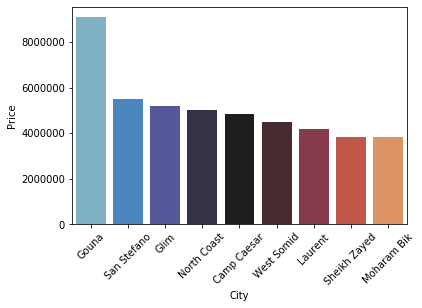

In [16]:
top_Price_cities = pd.DataFrame(data = df.groupby("City").Price.mean().sort_values(ascending = False).head(9))
top_Price_cities = top_Price_cities.rename(columns = {"City":"City","City":"Price"})
top_Price_cities = top_Price_cities.reset_index()

fig = sns.barplot(data = top_Price_cities , x = "City",y="Price",palette = "icefire")
plt.xticks(rotation=45)
plt.show()

In [17]:
top_Price_cities = pd.DataFrame(data = df.groupby("City").Price.mean().sort_values(ascending = False).head(9))
top_Price_cities = top_Price_cities.rename(columns = {"City":"City","City":"Price"})
top_Price_cities = top_Price_cities.reset_index()


px.histogram(top_Price_cities , x = "City",y="Price"
             ,color_discrete_sequence =px.colors.qualitative.D3
             ,marginal = "box",title = "Prices versus city")

In [18]:
top_Price_cities.describe()

,Price
count,9.000000e+00
mean,5.104234e+06
std,1.605484e+06
min,3.821117e+06
25%,4.166667e+06
50%,4.825000e+06
75%,5.212500e+06
max,9.084438e+06


In [19]:
px.pie(data_frame=top_Price_cities,names="City",values="Price")

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gouna has the hightest prices,the rest have close prices</p>

In [20]:
types = df.groupby("Type")["Price"].mean().sort_values(ascending =True).reset_index(name='Price')

px.bar(x="Price",y="Type",template = "plotly_dark",data_frame=types,color_discrete_sequence=px.colors.sequential.Magenta,title = "Units price available according to Type")

In [21]:
types

,Type,Price
0,Studio,1.854609e+06
1,Apartment,2.529637e+06
2,Chalet,3.076308e+06
3,Penthouse,3.885107e+06
4,Duplex,4.359188e+06
5,Town House,5.541113e+06
6,Twin house,5.602630e+06
7,Standalone Villa,1.453756e+07


In [22]:
px.pie(data_frame=types,names="Type",values="Price")

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Standalone vills are hightest in regard of prices</p>

* Area of homes and prices

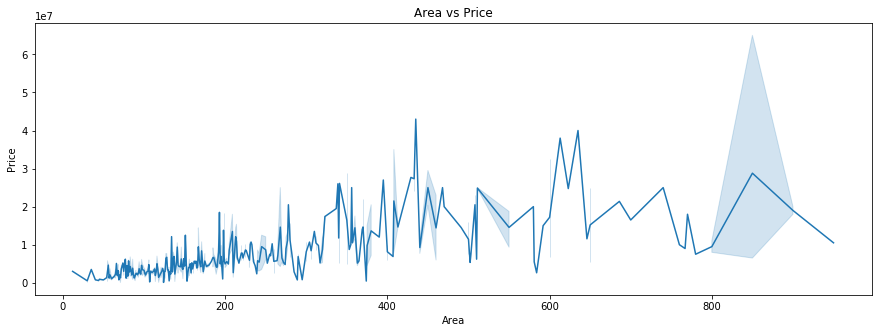

In [23]:
area_price = df[df["City"] == "North Coast"][["Area","Price","Level"]]

plt.figure(figsize = (15,5))
sns.lineplot(data = area_price , x = "Area",y="Price")
plt.title("Area vs Price")
plt.xlabel("Area")
plt.show()

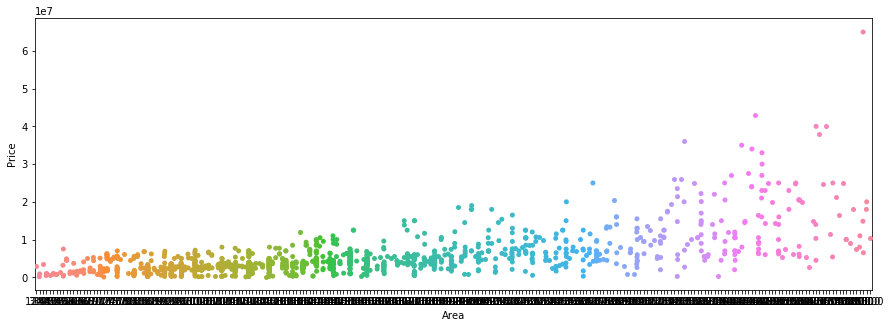

In [24]:
plt.figure(figsize = (15,5))
sns.stripplot(x="Area",y="Price",data=area_price )
plt.show()

In [28]:
def area_range(x):
    if (x >= 100.0) & (x<= 160.0):
        return "100 to 160 m²"
    elif (x > 160.0) & (x <= 200.0):
        return "160 to 200 m²"
    elif (x > 200.0) & (x <= 250.0):
        return "200 to 250 m²"
    elif (x > 250.0) & (x <= 400.0):
        return "250 to 400 m²"
        

In [29]:
price_area = df[["Price","Area"]].reset_index()
price_area["Average Price"] = price_area["Price"]
price_area["Area"] = price_area["Area"].apply(area_range)
price_area1 = price_area.groupby("Area")["Average Price"].mean().round(5).reset_index()

In [30]:
price_area1

,Area,Average Price
0,100 to 160 m²,2.537727e+06
1,160 to 200 m²,3.397071e+06
2,200 to 250 m²,4.666703e+06
3,250 to 400 m²,7.168412e+06


In [31]:
px.bar(data_frame=price_area1,x="Area" , y = "Average Price",color_discrete_sequence=px.colors.qualitative.Dark2 )

In [32]:
price_area1

,Area,Average Price
0,100 to 160 m²,2.537727e+06
1,160 to 200 m²,3.397071e+06
2,200 to 250 m²,4.666703e+06
3,250 to 400 m²,7.168412e+06


In [33]:

fig = px.line(price_area1,x='Area',y='Average Price',text='Average Price',hover_name='Area',markers=True,template='plotly_dark')
fig.update_layout(title_x=0.5)
fig.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">As the area inc the prices of homes goes up relativly as shown</p>

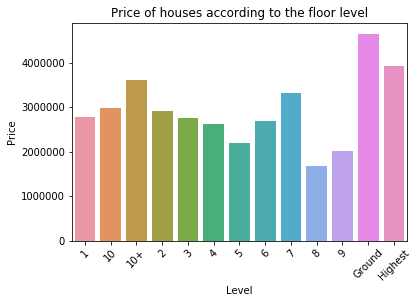

In [34]:
price_floor = df.groupby('Level').Price.mean().reset_index(name='Price')
price_floor.sort_values("Level",ascending =True)


sns.barplot(data=price_floor,x="Level",y="Price")
plt.title("Price of houses according to the floor level")
plt.xticks(rotation=45)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">It appears that first and last floors have high prices</p>

## Delivery date

In [35]:
types = df.groupby("Type").size().sort_values(ascending =True).reset_index(name='counts')

px.bar(x="counts",y="Type",data_frame=types,color_discrete_sequence=px.colors.qualitative.Dark2,title = "Units available according to Type")

In [36]:
Delivery_Term = df.groupby("Delivery_Term").size().sort_values(ascending =True).reset_index(name='counts')
px.pie(data_frame = Delivery_Term ,names= "Delivery_Term",values ="counts",color_discrete_sequence = px.colors.sequential.GnBu_r)

In [37]:
Delivery_Term = df.groupby(['Delivery_Term',"Type"]).size().sort_values(ascending =True).reset_index(name='counts')
px.bar(x="counts",y="Delivery_Term",data_frame=Delivery_Term, color = "Type",
       color_discrete_sequence=px.colors.qualitative.Bold)

In [38]:
Delivery_Date = df.groupby(['Delivery_Date',"Type"]).size().sort_values(ascending =True).reset_index(name='counts')
Delivery_Date = Delivery_Date.convert_dtypes()
Delivery_Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Delivery_Date  60 non-null     string
 1   Type           60 non-null     string
 2   counts         60 non-null     Int64 
dtypes: Int64(1), string(2)
memory usage: 1.6 KB


In [39]:
fig = px.bar(x="counts",y="Delivery_Date",data_frame=Delivery_Date,color = "Type",title = "Date of Receiving the units",
       color_discrete_sequence=['#ff9999','#66b3ff','#AF0038','#ffcc99',"#00A08B","yellow","#cea9bc","#0a417a","#A777F1","#005F60"])
fig.update_layout(height=500,width = 1000)
fig.show()

In [40]:
Delivery_Date.groupby("Delivery_Date")["counts"].sum()

Delivery_Date
2022                 51
2023                238
2024                337
2025                302
2026                147
2027                  3
Ready to move      3442
soon                508
within 6 months      53
Name: counts, dtype: Int64

In [41]:
Date_of_Receiving_the_units = pd.DataFrame(data = 
                                           {"Ready to receive":3442,
                                            "Soon":508,
                                            "by 2022":51,
                                            "by 2023":238,
                                            "by 2024":337,
                                            "by 2025":302,
                                            "by 2026":147,
                                            "by 2027":3,
                                            "within 6 months" :53
                                           },index=[0])
Date_of_Receiving_the_units

,Ready to receive,Soon,by 2022,by 2023,by 2024,by 2025,by 2026,by 2027,within 6 months
0,3442,508,51,238,337,302,147,3,53


## Cash or installmeent

In [42]:
index = pd.DataFrame(data = df[df["Payment_Option"] != "Unknown Payment"])["Payment_Option"].reset_index()
index["Payment_Option"].unique()

<StringArray>
['Cash', 'Cash or Installment', 'Installment']
Length: 3, dtype: string

In [43]:
indexpie= index["Payment_Option"].value_counts().reset_index()
indexpie.reset_index()
indexpie[["Payment_Option","count"]] = indexpie[["index","Payment_Option"]]


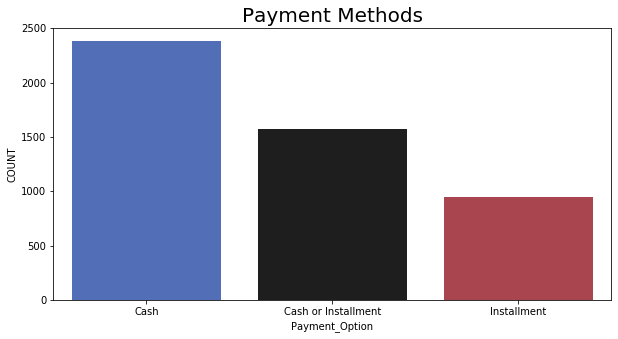

In [44]:
plt.figure(figsize =(10,5))
sns.countplot(x="Payment_Option",data=index,palette="icefire")
plt.xlabel("Payment_Option",fontsize=10,color="black")
plt.ylabel("COUNT",fontsize=10,color="black")
plt.title("Payment Methods",fontsize=20)
plt.show()

In [45]:
px.pie(data_frame=indexpie,names="Payment_Option",values="count")

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Most of homes are bought in cash followed by cash or installment 

<a id="1"></a>
# <p style="padding:10px;background-color:#00A08B;margin:0;color:White;font-family:Georgia;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Result</p>

As shown North Coast is the most frequent city
Gouna has the hightest prices,the rest have close prices
standalone vills are hightest in regard of prices

It appears that first and last floors have highest prices

70% of the projects are finished and read to be received